<a href="https://colab.research.google.com/github/nilamaula26/Aplikasi-Login/blob/main/Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/TRAINING-DATA (1) (1).csv')
df.head()

,tahun,jml_penduduk,angka_kelahiran,angka_pernikahan,Keterangan
0,2012,5672,567,789,1
1,2013,8723,654,981,1
2,2014,6739,779,746,0
3,2015,4567,765,894,1
4,2016,5891,389,553,0


<Axes: >

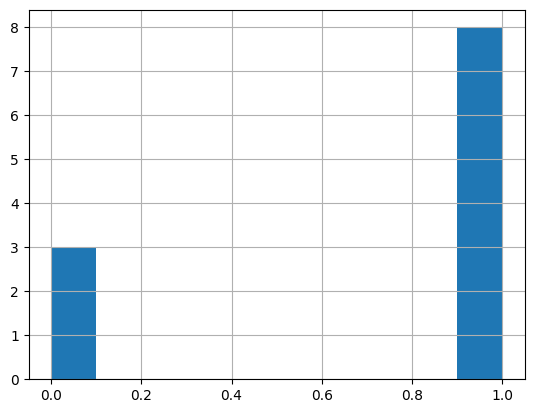

In [45]:
df["Keterangan"].hist()

<Axes: >

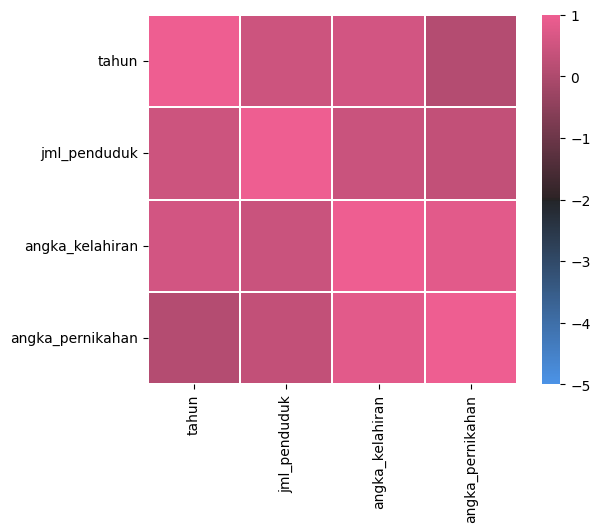

In [46]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-5, cmap=cmap, square=True, linewidths=.2)

In [51]:
df = df[["angka_kelahiran","Keterangan"]]
df.head(11)

,angka_kelahiran,Keterangan
0,567,1
1,654,1
2,779,0
3,765,1
4,389,0
5,287,1
6,567,1
7,463,0
8,897,1
9,1098,1


<Axes: xlabel='angka_kelahiran', ylabel='Count'>

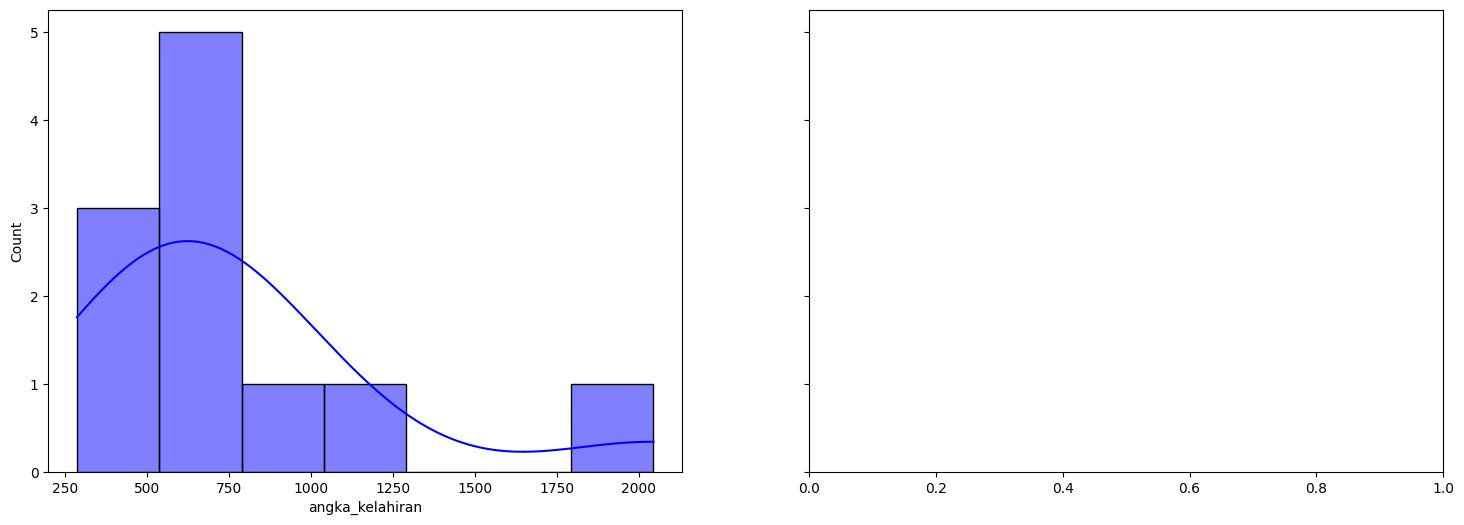

In [73]:
fig, axes = plt.subplots(1,2, figsize=(18,6), sharey=True)
sns.histplot(df, ax=axes[0], x="angka_kelahiran", kde=True, color="b")

In [66]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [68]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, Y_train);

In [70]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, Y_test)
f1 = f1_score(y_pred, Y_test, average="weighted")

print("Confussion matrix:", confusion_matrix(y_pred, Y_test))
print("Accuracy:", accuray)
print("F1 Score:", f1)

Confussion matrix: [[0 0]
 [2 1]]
Accuracy: 0.3333333333333333
F1 Score: 0.5
